In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
%matplotlib inline
pd.set_option("display.max_columns",300)
pd.set_option("display.max_rows",300)



In [2]:
churn=pd.read_csv("telecom_churn_data.csv")

In [3]:
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
churn.shape

(99999, 226)

In [5]:
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

In [6]:
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

In [7]:
import sweetviz as sv
sweet_report=sv.analyze(churn,pairwise_analysis="off")
sweet_report.show_html("sweet_report.html")


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
churn_copy=churn.copy()

In [9]:
churn.columns.tolist()



['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [10]:
id_cols=['mobile_number','circle_id']
date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols=['night_pck_user_6','night_pck_user_7','night_pck_user_8', 'night_pck_user_9',
          'fb_user_6','fb_user_7','fb_user_8','fb_user_9']

num_cols=[column for column in churn.columns if column not in id_cols+date_cols+cat_cols]

In [11]:
print("id columns:",len(id_cols))
print("date columns:",len(date_cols))
print("categorical columns:",len(cat_cols))
print("numerical columns:",len(num_cols))

id columns: 2
date columns: 12
categorical columns: 8
numerical columns: 204


In [12]:
print(len(id_cols)+len(date_cols)+len(cat_cols)+len(num_cols)==churn.shape[1])

True


# handling missing values


In [13]:
churn.isnull().sum()*100/churn.shape[0]

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

In [14]:
(churn.isnull().sum()*100/churn.shape[0]).sort_values(ascending=False)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

In [15]:
recharge_cols=churn.columns[churn.columns.str.contains("rech")]

In [16]:
recharge_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [17]:
rech_col_null=churn.loc[:,recharge_cols].isnull().sum()*100/churn.shape[0]
rech_col_null.sort_values()

total_rech_num_6             0.000000
total_rech_num_7             0.000000
total_rech_num_8             0.000000
total_rech_num_9             0.000000
total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_6          1.607016
date_of_last_rech_7          1.767018
date_of_last_rech_8          3.622036
date_of_last_rech_9          4.760048
count_rech_3g_8             73.660737
date_of_last_rech_data_8    73.660737
av_rech_amt_data_8          73.660737
count_rech_2g_8             73.660737
total_rech_data_8           73.660737
max_rech_data_8             73.660737
count_rech_3g_9             74.077741
count_rech_2g_9             74.077741
max_rech_data_9             74.077741
date_of_last_rech_data_9    74.077741
total_rech_d

In [18]:
churn[recharge_cols].head(20)

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
0,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN
1,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN,NaN,1.0,2.0,NaN,NaN,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN
2,5,4,2,7,168,315,116,358,86,200,86,100,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0
3,10,11,18,14,230,310,601,410,60,50,50,50,6/28/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,6,3,4,196,350,287,200,56,110,110,50,6/26/2014,7/28/2014,8/9/2014,9/28/2014,6/4/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,56.0,NaN,NaN,NaN
5,2,2,3,3,120,0,130,130,120,0,130,130,6/19/2014,7/17/2014,8/24/2014,9/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15,10,11,7,499,222,294,141,90,37,50,30,6/28/2014,7/31/2014,8/28/2014,9/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,19,21,14,15,437,601,120,186,90,154,30,36,6/25/2014,7/31/2014,8/30/2014,9/30/2014,NaN,7/31/2014,8/23/2014,NaN,NaN,2.0,3.0,NaN,NaN,154.0,23.0,NaN,NaN,2.0,3.0,NaN,NaN,0.0,0.0,NaN,NaN,177.0,69.0,NaN
9,4,2,5,3,220,195,210,180,110,154,50,130,6/29/2014,7/23/2014,8/29/2014,9/20/2014,NaN,7/23/2014,NaN,NaN,NaN,1.0,NaN,NaN,NaN,154.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,154.0,NaN,NaN


In [19]:
churn[recharge_cols].describe(include="all")

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,98392,98232,96377,95239,25153,25571,26339,25922,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,31,31,30,30,31,31,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16960,17288,14706,22623,1888,1813,1998,2329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,144.000000,144.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000


In [20]:
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [21]:
churn[zero_impute]=churn[zero_impute].apply(lambda x:x.fillna(0))

In [22]:
churn[zero_impute].isnull().sum()*100/len(churn)

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
dtype: float64

In [23]:
print(churn[zero_impute].describe(include="all"))

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count       99999.000000        99999.000000        99999.000000   
mean            0.632806           48.445409           51.393440   
std             1.669040          127.743863          132.629365   
min             0.000000            0.000000            0.000000   
25%             0.000000            0.000000            0.000000 

In [24]:
print("shape before dropping:",churn.shape)
churn=churn.drop(id_cols+date_cols,axis=1)
print("shape after dropping:",churn.shape)

shape before dropping: (99999, 226)
shape after dropping: (99999, 212)


In [25]:
churn[cat_cols].isnull().sum()*100/len(churn)

night_pck_user_6    74.846748
night_pck_user_7    74.428744
night_pck_user_8    73.660737
night_pck_user_9    74.077741
fb_user_6           74.846748
fb_user_7           74.428744
fb_user_8           73.660737
fb_user_9           74.077741
dtype: float64

In [26]:
churn[cat_cols].head(20)

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN
1,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,0.0,0.0,NaN,NaN,1.0,1.0,NaN
9,NaN,0.0,NaN,NaN,NaN,1.0,NaN,NaN


In [27]:
churn[cat_cols]=churn[cat_cols].apply(lambda x:x.fillna(-1))

In [28]:
churn[cat_cols].isnull().sum()*100/len(churn)

night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
night_pck_user_9    0.0
fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
fb_user_9           0.0
dtype: float64

In [29]:
initial_cols=churn.shape[1]
threshold_value=0.7
include_cols=list(churn.apply(lambda column:True if column.isnull().sum()/churn.shape[0] < threshold_value else False))
drop_cols=pd.DataFrame({'Features':churn.columns,'include':include_cols})
drop_cols.loc[drop_cols.include==True,:]

,Features,include
0,loc_og_t2o_mou,True
1,std_og_t2o_mou,True
2,loc_ic_t2o_mou,True
3,arpu_6,True
4,arpu_7,True
5,arpu_8,True
6,arpu_9,True
7,onnet_mou_6,True
8,onnet_mou_7,True
9,onnet_mou_8,True


In [30]:
churn=churn.loc[:,include_cols]
dropped_cols=churn.shape[1]-initial_cols
print("{0} columns dropped:".format(dropped_cols))

-16 columns dropped:


In [31]:
(churn.isnull().sum()*100/len(churn)).sort_values(ascending =False)

std_og_mou_9          7.745077
ic_others_9           7.745077
std_ic_mou_9          7.745077
spl_og_mou_9          7.745077
loc_og_t2m_mou_9      7.745077
spl_ic_mou_9          7.745077
isd_ic_mou_9          7.745077
loc_og_t2f_mou_9      7.745077
isd_og_mou_9          7.745077
roam_og_mou_9         7.745077
loc_og_t2c_mou_9      7.745077
og_others_9           7.745077
loc_og_mou_9          7.745077
std_og_t2c_mou_9      7.745077
std_og_t2f_mou_9      7.745077
std_og_t2t_mou_9      7.745077
std_ic_t2o_mou_9      7.745077
loc_og_t2t_mou_9      7.745077
std_og_t2m_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
loc_ic_t2f_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
loc_ic_mou_9          7.745077
offnet_mou_9          7.745077
loc_ic_t2m_mou_9      7.745077
std_ic_t2m_mou_9      7.745077
loc_ic_t2t_mou_9      7.745077
roam_ic_mou_9         7.745077
onnet_mou_9           7.745077
std_og_t2c_mou_8      5.378054
loc_ic_t2m_mou_8      5.378054
isd_og_mou_8          5.378054
std_og_m

In [32]:
cols=[col for col in churn.columns if churn[col].isnull().any()]

In [33]:
churn[cols].isnull().sum()*100/len(churn)


loc_og_t2o_mou      1.018010
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
onnet_mou_6         3.937039
onnet_mou_7         3.859039
onnet_mou_8         5.378054
onnet_mou_9         7.745077
offnet_mou_6        3.937039
offnet_mou_7        3.859039
offnet_mou_8        5.378054
offnet_mou_9        7.745077
roam_ic_mou_6       3.937039
roam_ic_mou_7       3.859039
roam_ic_mou_8       5.378054
roam_ic_mou_9       7.745077
roam_og_mou_6       3.937039
roam_og_mou_7       3.859039
roam_og_mou_8       5.378054
roam_og_mou_9       7.745077
loc_og_t2t_mou_6    3.937039
loc_og_t2t_mou_7    3.859039
loc_og_t2t_mou_8    5.378054
loc_og_t2t_mou_9    7.745077
loc_og_t2m_mou_6    3.937039
loc_og_t2m_mou_7    3.859039
loc_og_t2m_mou_8    5.378054
loc_og_t2m_mou_9    7.745077
loc_og_t2f_mou_6    3.937039
loc_og_t2f_mou_7    3.859039
loc_og_t2f_mou_8    5.378054
loc_og_t2f_mou_9    7.745077
loc_og_t2c_mou_6    3.937039
loc_og_t2c_mou_7    3.859039
loc_og_t2c_mou_8    5.378054
loc_og_t2c_mou

In [34]:
from fancyimpute import IterativeImputer as MICE
mice_impute=MICE()
churn_imputed = mice_impute.fit_transform(churn)


In [35]:
churn[cols]=pd.DataFrame(churn_imputed,columns=cols)
churn.isnull().sum()*100/len(churn)


loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [36]:
churn.shape

(99999, 196)

In [37]:
print(churn.isnull().sum()*100/len(churn))

loc_og_t2o_mou        0.0
std_og_t2o_mou        0.0
loc_ic_t2o_mou        0.0
arpu_6                0.0
arpu_7                0.0
arpu_8                0.0
arpu_9                0.0
onnet_mou_6           0.0
onnet_mou_7           0.0
onnet_mou_8           0.0
onnet_mou_9           0.0
offnet_mou_6          0.0
offnet_mou_7          0.0
offnet_mou_8          0.0
offnet_mou_9          0.0
roam_ic_mou_6         0.0
roam_ic_mou_7         0.0
roam_ic_mou_8         0.0
roam_ic_mou_9         0.0
roam_og_mou_6         0.0
roam_og_mou_7         0.0
roam_og_mou_8         0.0
roam_og_mou_9         0.0
loc_og_t2t_mou_6      0.0
loc_og_t2t_mou_7      0.0
loc_og_t2t_mou_8      0.0
loc_og_t2t_mou_9      0.0
loc_og_t2m_mou_6      0.0
loc_og_t2m_mou_7      0.0
loc_og_t2m_mou_8      0.0
loc_og_t2m_mou_9      0.0
loc_og_t2f_mou_6      0.0
loc_og_t2f_mou_7      0.0
loc_og_t2f_mou_8      0.0
loc_og_t2f_mou_9      0.0
loc_og_t2c_mou_6      0.0
loc_og_t2c_mou_7      0.0
loc_og_t2c_mou_8      0.0
loc_og_t2c_m

In [38]:
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

In [39]:
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [40]:
churn['av_amt_data_6_7']=(churn.amt_data_6 +churn.amt_data_7)/2

In [41]:
print("recharge amount at 70th percentile:{0}".format(churn.av_amt_data_6_7.quantile(0.7)))

recharge amount at 70th percentile:478.0


In [42]:
churn_filtered=churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7),:]

In [43]:
churn_filtered=churn_filtered.reset_index(drop=True)
churn_filtered.shape

(30001, 201)

In [44]:
churn_filtered=churn_filtered.drop(["total_data_rech_6","total_data_rech_7","amt_data_6","amt_data_7","av_amt_data_6_7"],axis=1)
churn_filtered.shape

(30001, 196)

# derive churn

In [45]:
churn_filtered.columns.tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [46]:
churn_filtered["total_calls_mou_9"]=churn_filtered.total_ic_mou_9 + churn_filtered.total_og_mou_9

In [47]:
churn_filtered["total_internet_mb_9"]=churn_filtered.vol_2g_mb_9 + churn_filtered.vol_3g_mb_9


In [48]:
churn_filtered["churn"]=churn_filtered.apply(lambda row:1 if (row.total_calls_mou_9==0 and row.total_internet_mb_9==0) else 0,axis=1)

In [49]:
churn_filtered.churn

0        1
1        1
2        0
3        0
4        0
        ..
29996    0
29997    0
29998    0
29999    0
30000    0
Name: churn, Length: 30001, dtype: int64

In [50]:
churn_filtered=churn_filtered.drop(["total_calls_mou_9","total_internet_mb_9"],axis=1)

In [51]:
churn_filtered.churn=churn_filtered.churn.astype("category")
print("churn ratio:")
print(churn_filtered.churn.value_counts()*100/len(churn_filtered))

churn ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [52]:
diff_cols=churn_filtered.columns[churn_filtered.columns.str.contains("mou" ,"arpu")].tolist()
print(diff_cols)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', '

In [53]:
churn_filtered["arpu_diff"]=churn_filtered.arpu_8  - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)

churn_filtered["onnet_mou_diff"]=churn_filtered.onnet_mou_8 -((churn_filtered.onnet_mou_6 + churn_filtered.onnet_mou_7)/2)

churn_filtered["offnet_mou_diff"]=churn_filtered.offnet_mou_8 - ((churn_filtered.offnet_mou_6 + churn_filtered.offnet_mou_7)/2)

churn_filtered["roam_ic_mou_diff"]= churn_filtered.roam_ic_mou_8 -((churn_filtered.roam_ic_mou_6 + churn_filtered.roam_ic_mou_7)/2)

churn_filtered["roam_og_mou_diff"]= churn_filtered.roam_og_mou_8 -((churn_filtered.roam_og_mou_6 + churn_filtered.roam_og_mou_7)/2)

churn_filtered['loc_ic_mou_diff'] = churn_filtered.loc_ic_mou_8 - ((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)

churn_filtered["loc_og_mou_diff"]= churn_filtered.loc_og_mou_8 -((churn_filtered.loc_og_mou_6 + churn_filtered.loc_og_mou_7)/2)

churn_filtered["std_og_mou_diff"]= churn_filtered.std_og_mou_8 -((churn_filtered.std_og_mou_6 + churn_filtered.std_og_mou_7)/2)

churn_filtered["isd_og_mou_diff"]= churn_filtered.isd_og_mou_8 -((churn_filtered.isd_og_mou_6 + churn_filtered.isd_og_mou_7)/2)

churn_filtered["spl_og_mou_diff"]= churn_filtered.spl_og_mou_8 -((churn_filtered.spl_og_mou_6 + churn_filtered.spl_og_mou_7)/2)

churn_filtered["total_og_mou_diff"]= churn_filtered.total_og_mou_8 -((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)

churn_filtered["loc_ic_mou_diff"]= churn_filtered.loc_ic_mou_8 -((churn_filtered.loc_ic_mou_6 + churn_filtered.loc_ic_mou_7)/2)

churn_filtered["std_ic_mou_diff"]= churn_filtered.std_ic_mou_8 -((churn_filtered.std_ic_mou_6 + churn_filtered.std_ic_mou_7)/2)

churn_filtered["isd_ic_mou_diff"]= churn_filtered.isd_ic_mou_8 -((churn_filtered.isd_ic_mou_6 + churn_filtered.isd_ic_mou_7)/2)

churn_filtered["spl_ic_mou_diff"]= churn_filtered.spl_ic_mou_8 -((churn_filtered.spl_ic_mou_6 + churn_filtered.spl_ic_mou_7)/2)




churn_filtered["total_ic_mou_diff"]= churn_filtered.total_ic_mou_8 -((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)

churn_filtered["total_rech_num_diff"]= churn_filtered.total_rech_num_8 -((churn_filtered.total_rech_num_6 + churn_filtered.total_rech_num_7)/2)

churn_filtered["total_rech_amt_diff"]= churn_filtered.total_rech_amt_8 -((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)

churn_filtered["max_rech_amt_diff"]= churn_filtered.max_rech_amt_8 -((churn_filtered.max_rech_amt_6 + churn_filtered.max_rech_amt_7)/2)

churn_filtered["total_rech_data_diff"]= churn_filtered.total_rech_data_8 -((churn_filtered.total_rech_data_6 + churn_filtered.total_rech_data_7)/2)

churn_filtered["max_rech_data_diff"]= churn_filtered.max_rech_data_8 -((churn_filtered.max_rech_data_6 + churn_filtered.max_rech_data_7)/2)

churn_filtered["av_rech_amt_data_diff"]= churn_filtered.av_rech_amt_data_8 -((churn_filtered.av_rech_amt_data_6 + churn_filtered.av_rech_amt_data_7)/2)

churn_filtered["vol_2g_mb_diff"]= churn_filtered.vol_2g_mb_8 -((churn_filtered.vol_2g_mb_6 + churn_filtered.vol_2g_mb_7)/2)

churn_filtered["vol_3g_mb_diff"]= churn_filtered.vol_3g_mb_8 -((churn_filtered.vol_3g_mb_6 + churn_filtered.vol_3g_mb_7)/2)


In [54]:
churn_filtered["spl_og_mou_diff"].describe()

count    30001.000000
mean         0.196494
std         18.030956
min      -1081.910000
25%         -2.700000
50%          0.000000
75%          1.710000
max        747.620000
Name: spl_og_mou_diff, dtype: float64

In [55]:
churn_filtered.shape

(30001, 220)

# drop columns for 9th month

In [56]:
churn_filtered=churn_filtered.filter(regex='[^9]$',axis=1)
churn_filtered.shape

(30001, 173)

In [57]:
col_9_names = churn.filter(regex='9$', axis=1).columns
                         

In [58]:


# update num_cols and cat_cols column name list
cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in churn_filtered.columns if col not in cat_cols]

# visualization

In [59]:
churn_filtered[num_cols] = churn_filtered[num_cols].apply(pd.to_numeric)
churn_filtered[cat_cols] = churn_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

In [60]:
# create plotting functions
def data_type(variable):
    if variable.dtype == np.int64 or variable.dtype == np.float64:
        return 'numerical'
    elif variable.dtype == 'category':
        return 'categorical'
    
def univariate(variable, stats=True):
    
    if data_type(variable) == 'numerical':
        sns.distplot(variable)
        if stats == True:
            print(variable.describe())
    
    elif data_type(variable) == 'categorical':
        sns.countplot(variable)
        if stats == True:
            print(variable.value_counts())
            
    else:
        print("Invalid variable passed: either pass a numeric variable or a categorical vairable.")
        
def bivariate(var1, var2):
    if data_type(var1) == 'numerical' and data_type(var2) == 'categorical':
        sns.regplot(var1, var2)
    elif (data_type(var1) == 'categorical' and data_type(var2) == 'numerical') or (data_type(var1) == 'numerical' and data_type(var2) == 'categorical'):        
        sns.boxplot(var1, var2)
        
    
    

# univariate analysis

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


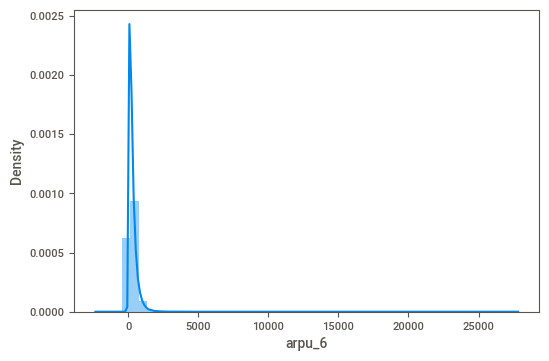

In [61]:
univariate(churn.arpu_6)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: loc_og_t2o_mou, dtype: float64


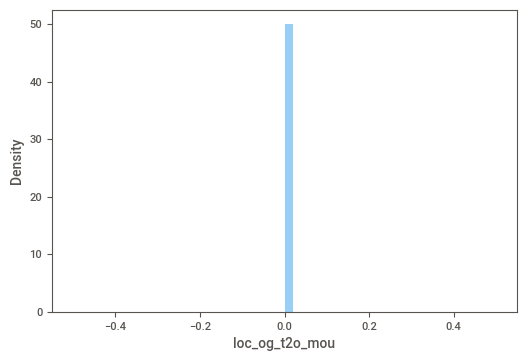

In [62]:
univariate(churn.loc_og_t2o_mou)

count    99999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: std_og_t2o_mou, dtype: float64


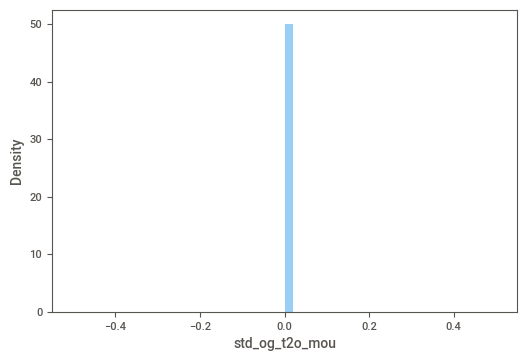

In [63]:
univariate(churn.std_og_t2o_mou)

count    99999.000000
mean       133.021972
std        300.534348
min        -47.242506
25%          7.410000
50%         37.160000
75%        131.874035
max      10752.560000
Name: onnet_mou_8, dtype: float64


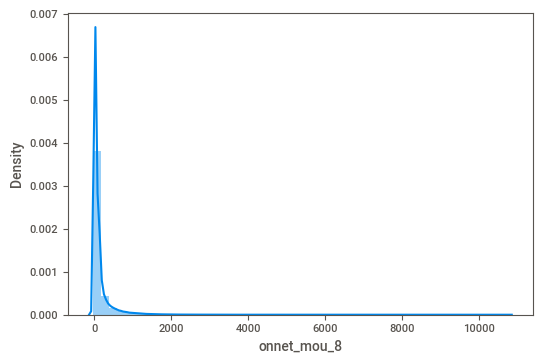

In [64]:
univariate(churn.onnet_mou_8)

count    99999.000000
mean       190.338917
std        306.784576
min        -14.957040
25%         31.230000
50%        101.280000
75%        203.480000
max      10310.760000
Name: offnet_mou_9, dtype: float64


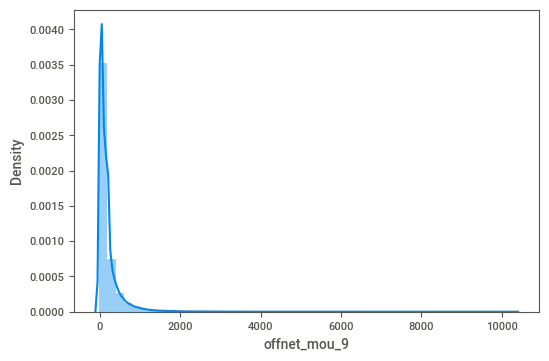

In [65]:
univariate(churn.offnet_mou_9)

# bivariate analysis

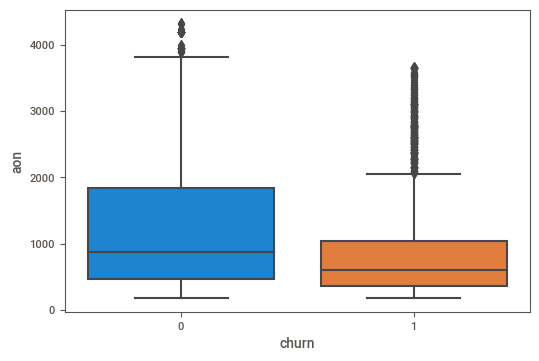

In [66]:
bivariate(churn_filtered.churn, churn_filtered.aon)

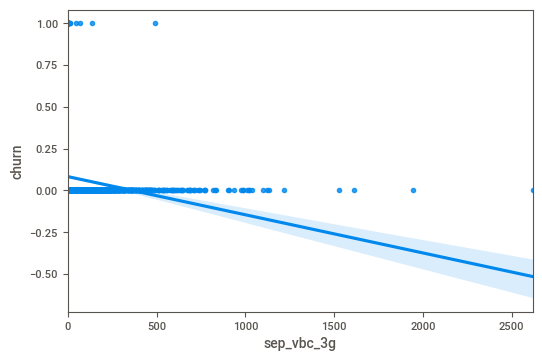

In [67]:
bivariate(churn_filtered.sep_vbc_3g,churn_filtered.churn)

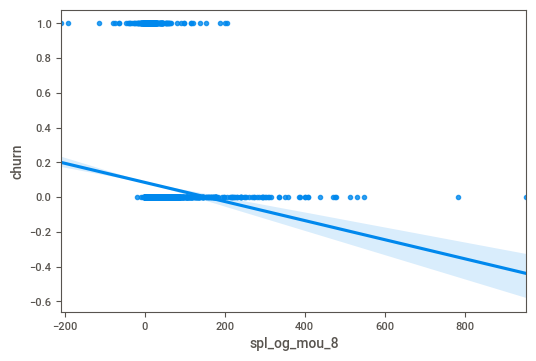

In [68]:
bivariate(churn_filtered.spl_og_mou_8,churn_filtered.churn)

In [69]:
pd.crosstab(churn_filtered.churn,churn_filtered.night_pck_user_8,normalize="columns")*100

night_pck_user_8,-1.0,0.0,1.0
churn,,,
0,85.89123,97.117602,97.360704
1,14.10877,2.882398,2.639296


In [70]:
pd.crosstab(churn_filtered.churn,churn_filtered.sachet_3g_8)

sachet_3g_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27,29,30,38,41
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24972,1609,399,184,106,86,43,35,28,19,15,8,11,10,6,6,2,2,3,1,3,3,2,1,1,1,2,1,1
1,2369,48,5,8,4,2,1,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


# cap outliers 

In [71]:
def cap_outliers(array,k=3):
    upper_limit=array.mean()+k*array.std()
    lower_limit=array.mean()-k*array.std()
    array[array<lower_limit]=lower_limit
    array[array>lower_limit]=upper_limit
    return array
    

In [72]:
churn_filtered[num_cols]=churn_filtered[num_cols].apply(cap_outliers,axis=0)

# modelling

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC




# preprocessing the data

In [74]:
churn_filtered["churn"]=pd.to_numeric(churn_filtered["churn"])

# train-test-split

In [75]:
X=churn_filtered.drop("churn",axis=1)
y=churn_filtered.churn
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4,stratify=y)

In [76]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22500, 172)
(22500,)
(7501, 172)
(7501,)


# aggregating the categorical columns


In [77]:
train=pd.concat([X_train,y_train],axis=1)
train.groupby("night_pck_user_6").churn.mean()
train.groupby("night_pck_user_7").churn.mean()
train.groupby("night_pck_user_8").churn.mean()
train.groupby("fb_user_6").churn.mean()
train.groupby("fb_user_7").churn.mean()
train.groupby("fb_user_8").churn.mean()

night_pck_user_6
-1.0    0.099165
0.0     0.066797
1.0     0.087838
Name: churn, dtype: float64

night_pck_user_7
-1.0    0.115746
0.0     0.055494
1.0     0.051282
Name: churn, dtype: float64

night_pck_user_8
-1.0    0.141108
0.0     0.029023
1.0     0.016194
Name: churn, dtype: float64

fb_user_6
-1.0    0.099165
0.0     0.069460
1.0     0.067124
Name: churn, dtype: float64

fb_user_7
-1.0    0.115746
0.0     0.059305
1.0     0.055082
Name: churn, dtype: float64

fb_user_8
-1.0    0.141108
0.0     0.066887
1.0     0.024463
Name: churn, dtype: float64

In [78]:
mapping={"night_pck_user_6":{-1: 0.099165,  0: 0.066797,  1: 0.087838},
         "night_pck_user_7":{-1: 0.115746,  0: 0.055494,  1: 0.051282},
         "night_pck_user_8":{-1: 0.141108,  0: 0.029023,  1: 0.016194},
         "fb_user_6"       :{-1: 0.099165,  0: 0.069460,  1: 0.067124},
         "fb_user_7"       :{-1: 0.115746,  0: 0.059305,  1: 0.055082},
         "fb_user_8"       :{-1: 0.141108,  0: 0.066887,  1: 0.024463}
        }
X_train.replace(mapping,inplace=True)
X_test.replace(mapping,inplace=True)


In [79]:
X_train[[col for col in cat_cols if col not in ["churn"]]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 4525 to 22754
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  22500 non-null  float64
 1   night_pck_user_7  22500 non-null  float64
 2   night_pck_user_8  22500 non-null  float64
 3   fb_user_6         22500 non-null  float64
 4   fb_user_7         22500 non-null  float64
 5   fb_user_8         22500 non-null  float64
dtypes: float64(6)
memory usage: 1.2 MB


# pca

In [80]:
pca=Pipeline([("scaler",StandardScaler()),("pca",PCA())])

In [81]:
pca.fit(X_train)
churn_pca=pca.fit_transform(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [82]:
import pandas as pd
pca = pca.named_steps['pca']
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       12.82
1       20.87
2       26.61
3       31.96
4       37.00
5       41.87
6       46.01
7       49.73
8       52.98
9       56.02
10      58.99
11      61.84
12      64.66
13      67.45
14      70.20
15      72.88
16      75.52
17      78.04
18      80.48
19      82.89
20      85.26
21      87.55
22      89.81
23      91.72
24      93.38
25      95.00
26      96.34
27      97.39
28      98.16
29      98.91
30      99.42
31      99.93
32      99.97
33     100.00
34     100.00
35     100.00
36     100.00
37     100.00
38     100.00
39     100.00
40     100.00
41     100.00
42     100.00
43     100.00
44     100.00
45     100.00
46     100.00
47     100.00
48     100.00
49     100.00
50     100.00
51     100.00
52     100.00
53     100.00
54     100.00
55     100.00
56     100.00
57     100.00
58     100.00
59     100.00
60     100.00
61     100.00
62     100.00
63     100.00
64     100.00
65     100.00
66     100.00
67     100.00
68     100.00
69     100.00
70     100.00
71    

<Figure size 875x500 with 0 Axes>

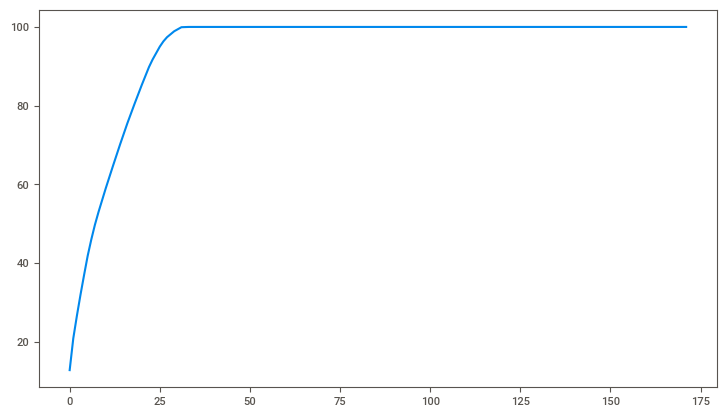

In [83]:
features=range(pca.n_components_)
cumulative_variance=np.round(np.cumsum(pca.explained_variance_ratio_)*100,decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

# pca and logistic regression

In [84]:
PCA_VARS=60
steps=[("scaler",StandardScaler()),
       ("pca",PCA(n_components=PCA_VARS)),
       ("logistic",LogisticRegression(class_weight="balanced"))
      ]
pipeline=Pipeline(steps)

In [85]:
pipeline.fit(X_train,y_train)
pipeline.score(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=60)),
                ('logistic', LogisticRegression(class_weight='balanced'))])

0.5839555555555556

# evaluate on test data

In [86]:
y_pred=pipeline.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

print(cm)

sensitivity,specificity,_=sensitivity_specificity_support(y_test,y_pred,average="binary")
print("sensitivity: \t",round(sensitivity,2),"\n","specificity: \t",round(specificity,2),sep="")

y_pred_prob=pipeline.predict_proba(X_test)[:,1]
print("AUC: \t",round(roc_auc_score(y_test,y_pred_prob),2))

[[3864 3027]
 [ 103  507]]
sensitivity: 	0.83
specificity: 	0.56
AUC: 	 0.77


# hyperparameter tuning

In [87]:
y_train.value_counts()/y_train.shape

0    0.918622
1    0.081378
Name: churn, dtype: float64

In [88]:
pca=PCA()

logistic=LogisticRegression(class_weight={0:0.081,1:0.92})

steps=[("scaler",StandardScaler()),
       ("pca",pca),
      ("logistic",logistic)
      ]

pca_logistic=Pipeline(steps)

params={"pca__n_components":[60,80],"logistic__C":[0.1,0.5,1,2,3,4,5,10],"logistic__penalty":["l1","l2"]}


folds=StratifiedKFold(n_splits=5,shuffle=True,random_state=4)

model=GridSearchCV(estimator=pca_logistic,cv=folds,param_grid=params,scoring="roc_auc",n_jobs=-1,verbose=1)

In [89]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.081,
                                                                         1: 0.92}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [90]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.027276,0.030522,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
1,2.329080,0.103978,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
2,2.362373,0.055394,0.051307,0.004386,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.764297,0.753538,0.766745,0.785795,0.736663,0.761408,0.016161,7
3,2.662979,0.040385,0.061904,0.005646,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.764297,0.753538,0.766745,0.785795,0.736663,0.761408,0.016161,7
4,1.743620,0.099679,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
5,2.100579,0.046746,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
6,2.362084,0.081365,0.054118,0.005057,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.765833,0.751940,0.766022,0.785511,0.736126,0.761086,0.016433,13
7,2.833949,0.065437,0.065215,0.009930,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.765833,0.751940,0.766022,0.785511,0.736126,0.761086,0.016433,13
8,1.689237,0.020988,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
9,2.192510,0.068959,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25


In [91]:
print("Best AUC:",model.best_score_)
print("Model best parameters:",model.best_params_)

Best AUC: 0.7622712336635591
Model best parameters: {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 60}


In [92]:
y_pred=model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)
print(cm)

sensitivity,specificity,_=sensitivity_specificity_support(y_test,y_pred,average="binary")
print("sensitivity: \t",round(sensitivity,2),"\n","specificity: \t",round(specificity,2),sep="")

y_pred_prob=model.predict_proba(X_test)[:,1]
print("AUC: \t",round(roc_auc_score(y_test,y_pred_prob),2))


[[3841 3050]
 [  98  512]]
sensitivity: 	0.84
specificity: 	0.56
AUC: 	 0.77
